# Cumulative event counter

### This notebook counts the cumulative spatio-temporal distribution of cellular events in the local neighbourhood of a series of apoptosis events

1. Load dictionary of ~apoptoses~ events and their corresponding times to base the spatiotemporal scans around 
2. Load corresponding tracking data and specify scan parameters
3. Iteratively calculate spatiotemporal distribution of cellular events around apoptoses, saving each distribution out a list of events/cell apperances

In [7]:
import calculate_radial_analysis as calculate
import dataio

import glob
import os
import re
from tqdm.auto import tqdm
import seaborn as sbs
import pandas as pd
%matplotlib inline

## 1) Event dictionary loader

Specify cell type to filter out unwanted apoptoses, want end result of event_dict that takes the format of :`event_dict = {event_ID:event_time}` 

where `event_ID` takes the format of: `GV{experiment_ID}_Pos{position_ID}_{cell_ID}_{cell_type}` 

For example: 

```
event_dict = {'GV0794_Pos4_393_GFP': '766',
             'GV0794_Pos7_364_GFP': '550',
             'GV0794_Pos7_457_GFP': '805',
             'GV0794_Pos7_369_GFP': '833',
             'GV0794_Pos7_292_GFP': '884',
             'GV0795_Pos4_358_GFP': '628',
             'GV0795_Pos4_18_GFP': '855',
             'GV0795_Pos4_1356_GFP': '992',
             'GV0795_Pos4_359_GFP': '1133',
             'GV0796_Pos4_542_GFP': '581',
             'GV0796_Pos4_1334_GFP': '719',
             'GV0796_Pos4_1586_GFP': '785'}
 ```
 
Function to apoptosis event dictionary from preexisting data store:

`dataio.apoptosis_list_loader(path_to_apop_lists, cell_type)`

Where the `path_to_apop_lists` is the directory containing the apoptosis information and the `cell_type` is either `'Scr'` or `'WT'`.

In [2]:
path_to_apop_lists = '/home/nathan/data/kraken/scr/h2b/giulia/experiment_information/apoptoses/final/all'
event_dict = dataio.apoptosis_list_loader(path_to_apop_lists, 'Scr')
event_dict

{'GV0797_Pos7_14_RFP': '99',
 'GV0797_Pos7_45_RFP': '201',
 'GV0797_Pos7_5_RFP': '254',
 'GV0797_Pos7_146_RFP': '388',
 'GV0797_Pos7_145_RFP': '398',
 'GV0797_Pos7_30_RFP': '393',
 'GV0797_Pos7_106_RFP': '424',
 'GV0797_Pos7_9_RFP': '405',
 'GV0797_Pos7_204_RFP': '487',
 'GV0797_Pos7_105_RFP': '473',
 'GV0797_Pos7_200_RFP': '486',
 'GV0797_Pos7_199_RFP': '625',
 'GV0797_Pos7_208_RFP': '475',
 'GV0797_Pos7_207_RFP': '475',
 'GV0797_Pos7_203_RFP': '516',
 'GV0797_Pos23_31_RFP': '166',
 'GV0797_Pos23_26_RFP': '60',
 'GV0797_Pos23_260_RFP': '235',
 'GV0797_Pos23_125_RFP': '79',
 'GV0797_Pos23_336_RFP': '456',
 'GV0797_Pos23_252_RFP': '207',
 'GV0797_Pos23_301_RFP': '207',
 'GV0797_Pos23_36_RFP': '180',
 'GV0797_Pos23_319_RFP': '556',
 'GV0797_Pos23_556_RFP': '638',
 'GV0798_Pos22_34_RFP': '54',
 'GV0798_Pos22_36_RFP': '125',
 'GV0798_Pos22_37_RFP': '469',
 'GV0798_Pos22_358_RFP': '461',
 'GV0798_Pos22_26_RFP': '761',
 'GV0798_Pos22_696_RFP': '871',
 'GV0798_Pos22_9_RFP': '190',
 'GV0798_Po

In [3]:
### optional parallelisation step
N_focal = len(event_dict)
para_frac_min, para_frac_max = int(0*N_focal), int(0.1*N_focal)  ## ie only do first 1/4 of all apops
delete_list =[]
for i, j in enumerate(event_dict):
    if not para_frac_min <= i< para_frac_max: 
        delete_list.append(j)
for i in delete_list:
    del event_dict[i]
print("Length of modified dict vs original:", len(event_dict), "/", N_focal)

Length of modified dict vs original: 183 / 1839


## 2) Load corresponding cell tracking data and specifiy other parameters

`dataio.hdf5_file_finder(parent_folder_hdf5)` loads a list of all hdf5 files when supplied with the parent directory of all the experiments. This relies on a typical sub-parent directory structure of `'GV****/Pos*/*aligned/HDF/segmented.hdf5'` (aligned folder optional)

In [4]:
### load tracking data
parent_folder_hdf5 = '/home/nathan/data/kraken/scr/h2b/giulia'
hdf5_file_list = dataio.hdf5_file_finder(parent_folder_hdf5)

### specify output path and neighbourhood scan parameters
radius, t_range = 1600, 1600
output_path = f'/home/nathan/data/results/radial_analysis_output/follow/raw_lists/scr_apop_wt_div_xyt/'
Path(output_path).mkdir(parents=True, exist_ok=True)

NameError: name 'Path' is not defined

In [34]:
calculate.radial_scan('WT', ## 'Scr',
    'DIVIDE', 
    event_dict, 
    hdf5_file_list, 
    radius, 
    t_range, 
   # num_bins, 
    output_path)

1600 1600


  0%|          | 0/156 [00:00<?, ?it/s]

[INFO][2022/03/02 07:47:04 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2022/03/02 07:47:04 PM] Loading tracks/obj_type_1


ID GV0798_Pos22_37_RFP
Loading GV0798/Pos22/
Btrack version no.: 0.4.3


[INFO][2022/03/02 07:47:04 PM] Loading objects/obj_type_1 (54200, 5) (44110 filtered: area>=100)
[INFO][2022/03/02 07:47:05 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2022/03/02 07:47:05 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2022/03/02 07:47:05 PM] Loading tracks/obj_type_2
[INFO][2022/03/02 07:47:06 PM] Loading objects/obj_type_2 (43364, 5) (33560 filtered: area>=100)
[INFO][2022/03/02 07:47:07 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0798/Pos22/Pos22_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0798/Pos22/
ID GV0798_Pos22_358_RFP
ID GV0798_Pos22_26_RFP
ID GV0798_Pos22_696_RFP
ID GV0798_Pos22_9_RFP
ID GV0798_Pos22_10_RFP
ID GV0798_Pos22_31_RFP
ID GV0798_Pos22_652_RFP
ID GV0798_Pos22_6_RFP
ID GV0798_Pos22_744_RFP
ID GV0798_Pos22_549_RFP
ID GV0798_Pos22_669_RFP


[INFO][2022/03/02 08:04:10 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2022/03/02 08:04:10 PM] Loading tracks/obj_type_1


ID GV0797_Pos21_78_RFP
Loading GV0797/Pos21/
Btrack version no.: 0.4.3


[INFO][2022/03/02 08:04:13 PM] Loading objects/obj_type_1 (211568, 5) (195992 filtered: area>=100)
[INFO][2022/03/02 08:04:18 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2022/03/02 08:04:18 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2022/03/02 08:04:18 PM] Loading tracks/obj_type_2
[INFO][2022/03/02 08:04:18 PM] Loading objects/obj_type_2 (26227, 5) (20975 filtered: area>=100)
[INFO][2022/03/02 08:04:19 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos21/
ID GV0797_Pos21_54_RFP
ID GV0797_Pos21_55_RFP
ID GV0797_Pos21_83_RFP
ID GV0797_Pos21_302_RFP
ID GV0797_Pos21_22_RFP
ID GV0797_Pos21_335_RFP
ID GV0797_Pos21_334_RFP
ID GV0797_Pos21_35_RFP


[INFO][2022/03/02 08:38:11 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2022/03/02 08:38:11 PM] Loading tracks/obj_type_1


ID GV0800_Pos16_15_RFP
Loading GV0800/Pos16/
Btrack version no.: 0.4.3


[INFO][2022/03/02 08:38:15 PM] Loading objects/obj_type_1 (361372, 5) (345214 filtered: area>=100)
[INFO][2022/03/02 08:38:22 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2022/03/02 08:38:22 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2022/03/02 08:38:22 PM] Loading tracks/obj_type_2
[INFO][2022/03/02 08:38:23 PM] Loading objects/obj_type_2 (88705, 5) (75574 filtered: area>=100)
[INFO][2022/03/02 08:38:26 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos16/
ID GV0800_Pos16_29_RFP
ID GV0800_Pos16_8_RFP
ID GV0800_Pos16_24_RFP
ID GV0800_Pos16_31_RFP
ID GV0800_Pos16_505_RFP
ID GV0800_Pos16_63_RFP
ID GV0800_Pos16_496_RFP
ID GV0800_Pos16_23_RFP
ID GV0800_Pos16_572_RFP
ID GV0800_Pos16_542_RFP
ID GV0800_Pos16_583_RFP
ID GV0800_Pos16_580_RFP
ID GV0800_Pos16_10_RFP
ID GV0800_Pos16_584_RFP
ID GV0800_Pos16_478_RFP
ID GV0800_Pos16_849_RFP
ID GV0800_Pos16_803_RFP
ID GV0800_Pos16_522_RFP
ID GV0800_Pos16_451_RFP
ID GV0800_Pos16_489_RFP
ID GV0800_Pos16_504_RFP
ID GV0800_Pos16_13_RFP
ID GV0800_Pos16_528_RFP
ID GV0800_Pos16_1155_RFP
ID GV0800_Pos16_632_RFP
ID GV0800_Pos16_1044_RFP


[INFO][2022/03/02 11:47:25 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2022/03/02 11:47:25 PM] Loading tracks/obj_type_1


ID GV0816_Pos13_37_RFP
Loading GV0816/Pos13/
Btrack version no.: 0.4.3


[INFO][2022/03/02 11:47:27 PM] Loading objects/obj_type_1 (115677, 5) (105175 filtered: area>=100)
[INFO][2022/03/02 11:47:30 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2022/03/02 11:47:30 PM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2022/03/02 11:47:30 PM] Loading tracks/obj_type_2
[INFO][2022/03/02 11:47:31 PM] Loading objects/obj_type_2 (55169, 5) (45321 filtered: area>=100)
[INFO][2022/03/02 11:47:31 PM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0816/Pos13/
ID GV0816_Pos13_53_RFP
ID GV0816_Pos13_57_RFP
ID GV0816_Pos13_45_RFP
ID GV0816_Pos13_43_RFP
ID GV0816_Pos13_415_RFP
ID GV0816_Pos13_478_RFP
ID GV0816_Pos13_635_RFP
ID GV0816_Pos13_679_RFP
ID GV0816_Pos13_42_RFP


[INFO][2022/03/03 12:08:20 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 12:08:20 AM] Loading tracks/obj_type_1


ID GV0800_Pos5_17_RFP
Loading GV0800/Pos5/
Btrack version no.: 0.4.3


[INFO][2022/03/03 12:08:20 AM] Loading objects/obj_type_1 (39998, 5) (30974 filtered: area>=100)
[INFO][2022/03/03 12:08:21 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2022/03/03 12:08:21 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 12:08:21 AM] Loading tracks/obj_type_2
[INFO][2022/03/03 12:08:21 AM] Loading objects/obj_type_2 (56244, 5) (41825 filtered: area>=100)
[INFO][2022/03/03 12:08:22 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0800/Pos5/Pos5_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0800/Pos5/
ID GV0800_Pos5_35_RFP
ID GV0800_Pos5_155_RFP
ID GV0800_Pos5_240_RFP
ID GV0800_Pos5_293_RFP
ID GV0800_Pos5_239_RFP
ID GV0800_Pos5_461_RFP
ID GV0800_Pos5_453_RFP
ID GV0800_Pos5_381_RFP
ID GV0800_Pos5_542_RFP
ID GV0800_Pos5_415_RFP
ID GV0800_Pos5_16_RFP
ID GV0800_Pos5_435_RFP
ID GV0800_Pos5_25_RFP
ID GV0800_Pos5_246_RFP
ID GV0800_Pos5_425_RFP
ID GV0800_Pos5_447_RFP
ID GV0800_Pos5_496_RFP
ID GV0800_Pos5_723_RFP


[INFO][2022/03/03 12:25:44 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 12:25:44 AM] Loading tracks/obj_type_1


ID GV0819_Pos0_23_RFP
Loading GV0819/Pos0/
Btrack version no.: 0.4.3


[INFO][2022/03/03 12:25:47 AM] Loading objects/obj_type_1 (285723, 5) (262105 filtered: area>=100)
[INFO][2022/03/03 12:25:53 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2022/03/03 12:25:53 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 12:25:53 AM] Loading tracks/obj_type_2
[INFO][2022/03/03 12:25:54 AM] Loading objects/obj_type_2 (79945, 5) (62473 filtered: area>=100)
[INFO][2022/03/03 12:25:55 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos0/
ID GV0819_Pos0_495_RFP
ID GV0819_Pos0_493_RFP
ID GV0819_Pos0_494_RFP
ID GV0819_Pos0_736_RFP
ID GV0819_Pos0_740_RFP
ID GV0819_Pos0_38_RFP
ID GV0819_Pos0_642_RFP
ID GV0819_Pos0_786_RFP
ID GV0819_Pos0_909_RFP
ID GV0819_Pos0_895_RFP
ID GV0819_Pos0_448_RFP
ID GV0819_Pos0_527_RFP
ID GV0819_Pos0_53_RFP
ID GV0819_Pos0_167_RFP
ID GV0819_Pos0_456_RFP
ID GV0819_Pos0_21_RFP
ID GV0819_Pos0_1366_RFP
ID GV0819_Pos0_1376_RFP
ID GV0819_Pos0_930_RFP
ID GV0819_Pos0_1088_RFP


[INFO][2022/03/03 02:39:58 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 02:39:58 AM] Loading tracks/obj_type_1


ID GV0795_Pos18_379_RFP
Loading GV0795/Pos18/
Btrack version no.: 0.4.3


[INFO][2022/03/03 02:39:58 AM] Loading objects/obj_type_1 (41273, 5) (28239 filtered: area>=100)
[INFO][2022/03/03 02:40:00 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2022/03/03 02:40:00 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 02:40:00 AM] Loading tracks/obj_type_2
[INFO][2022/03/03 02:40:00 AM] Loading objects/obj_type_2 (71063, 5) (58416 filtered: area>=100)
[INFO][2022/03/03 02:40:01 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0795/Pos18/Pos18_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0795/Pos18/
ID GV0795_Pos18_413_RFP
ID GV0795_Pos18_854_RFP
ID GV0795_Pos18_855_RFP
ID GV0795_Pos18_1179_RFP
ID GV0795_Pos18_409_RFP
ID GV0795_Pos18_684_RFP
ID GV0795_Pos18_802_RFP
ID GV0795_Pos18_46_RFP
ID GV0795_Pos18_521_RFP
ID GV0795_Pos18_3_RFP
ID GV0795_Pos18_715_RFP
ID GV0795_Pos18_28_RFP
ID GV0795_Pos18_12_RFP
ID GV0795_Pos18_19_RFP
ID GV0795_Pos18_728_RFP


[INFO][2022/03/03 02:58:11 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 02:58:11 AM] Loading tracks/obj_type_1


ID GV0819_Pos1_30_RFP
Loading GV0819/Pos1/
Btrack version no.: 0.4.3


[INFO][2022/03/03 02:58:14 AM] Loading objects/obj_type_1 (291961, 5) (262012 filtered: area>=100)
[INFO][2022/03/03 02:58:20 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2022/03/03 02:58:20 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 02:58:20 AM] Loading tracks/obj_type_2
[INFO][2022/03/03 02:58:21 AM] Loading objects/obj_type_2 (51130, 5) (42876 filtered: area>=100)
[INFO][2022/03/03 02:58:22 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0819/Pos1/
ID GV0819_Pos1_37_RFP
ID GV0819_Pos1_382_RFP
ID GV0819_Pos1_16_RFP
ID GV0819_Pos1_374_RFP
ID GV0819_Pos1_434_RFP
ID GV0819_Pos1_24_RFP
ID GV0819_Pos1_470_RFP
ID GV0819_Pos1_504_RFP
ID GV0819_Pos1_503_RFP
ID GV0819_Pos1_240_RFP
ID GV0819_Pos1_360_RFP


[INFO][2022/03/03 04:30:11 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 04:30:11 AM] Loading tracks/obj_type_1


ID GV0797_Pos18_46_RFP
Loading GV0797/Pos18/
Btrack version no.: 0.4.3


[INFO][2022/03/03 04:30:14 AM] Loading objects/obj_type_1 (274136, 5) (262171 filtered: area>=100)
[INFO][2022/03/03 04:30:20 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2022/03/03 04:30:20 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 04:30:20 AM] Loading tracks/obj_type_2
[INFO][2022/03/03 04:30:21 AM] Loading objects/obj_type_2 (17638, 5) (13852 filtered: area>=100)
[INFO][2022/03/03 04:30:21 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0797/Pos18/
ID GV0797_Pos18_17_RFP
ID GV0797_Pos18_135_RFP
ID GV0797_Pos18_134_RFP
ID GV0797_Pos18_7_RFP
ID GV0797_Pos18_218_RFP
ID GV0797_Pos18_250_RFP


[INFO][2022/03/03 04:54:52 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 04:54:52 AM] Loading tracks/obj_type_1


ID GV0820_Pos2_29_RFP
Loading GV0820/Pos2/
Btrack version no.: 0.4.3


[INFO][2022/03/03 04:54:54 AM] Loading objects/obj_type_1 (187834, 5) (174544 filtered: area>=100)
[INFO][2022/03/03 04:54:58 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2022/03/03 04:54:58 AM] Opening HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2022/03/03 04:54:58 AM] Loading tracks/obj_type_2
[INFO][2022/03/03 04:54:59 AM] Loading objects/obj_type_2 (73959, 5) (62237 filtered: area>=100)
[INFO][2022/03/03 04:55:01 AM] Closing HDF file: /home/nathan/data/kraken/scr/h2b/giulia/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)
Loaded GV0820/Pos2/
ID GV0820_Pos2_47_RFP
ID GV0820_Pos2_94_RFP
ID GV0820_Pos2_256_RFP
ID GV0820_Pos2_375_RFP
ID GV0820_Pos2_377_RFP
ID GV0820_Pos2_317_RFP
ID GV0820_Pos2_25_RFP
ID GV0820_Pos2_438_RFP
ID GV0820_Pos2_43_RFP
ID GV0820_Pos2_54_RFP
ID GV0820_Pos2_439_RFP
ID GV0820_Pos2_422_RFP
ID GV0820_Pos2_423_RFP
ID GV0820_Pos2_687_RFP
ID GV0820_Pos2_686_RFP
ID GV0820_Pos2_659_RFP
ID GV0820_Pos2_50_RFP
ID GV0820_Pos2_700_RFP
ID GV0820_Pos2_441_RFP
ID GV0820_Pos2_51_RFP
ID GV0820_Pos2_793_RFP
ID GV0820_Pos2_258_RFP


(156,
 [],
 ['GV0798_Pos22_37_RFP raw lists saved out successfully',
  'GV0798_Pos22_358_RFP raw lists saved out successfully',
  'GV0798_Pos22_26_RFP raw lists saved out successfully',
  'GV0798_Pos22_696_RFP raw lists saved out successfully',
  'GV0798_Pos22_9_RFP raw lists saved out successfully',
  'GV0798_Pos22_10_RFP raw lists saved out successfully',
  'GV0798_Pos22_31_RFP raw lists saved out successfully',
  'GV0798_Pos22_652_RFP raw lists saved out successfully',
  'GV0798_Pos22_6_RFP raw lists saved out successfully',
  'GV0798_Pos22_744_RFP raw lists saved out successfully',
  'GV0798_Pos22_549_RFP raw lists saved out successfully',
  'GV0798_Pos22_669_RFP raw lists saved out successfully',
  'GV0797_Pos21_78_RFP raw lists saved out successfully',
  'GV0797_Pos21_54_RFP raw lists saved out successfully',
  'GV0797_Pos21_55_RFP raw lists saved out successfully',
  'GV0797_Pos21_83_RFP raw lists saved out successfully',
  'GV0797_Pos21_302_RFP raw lists saved out successfully'

## 4) Compile individual heatmaps into cumulative plots 

In [8]:
files = glob.glob(f'{output_path}{radius}.{t_range}/*.csv')
event_files = [file for file in files if 'N_events' in file]

In [52]:
event_files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/scr_apop_wt_div_xyt/1600.1600/GV0819_Pos3_Scr_-1735_N_events_wt_rad_1600_t_range_1600_focal_txy_995_527_904.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/scr_apop_wt_div_xyt/1600.1600/GV0795_Pos6_Scr_-1094_N_events_wt_rad_1600_t_range_1600_focal_txy_985_287_860.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/scr_apop_wt_div_xyt/1600.1600/GV0807_Pos4_Scr_-276_N_events_wt_rad_1600_t_range_1600_focal_txy_490_606_1075.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/scr_apop_wt_div_xyt/1600.1600/GV0798_Pos23_Scr_-488_N_events_wt_rad_1600_t_range_1600_focal_txy_710_389_1097.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/scr_apop_wt_div_xyt/1600.1600/GV0797_Pos4_Scr_-34_N_events_wt_rad_1600_t_range_1600_focal_txy_559_243_1199.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/scr_apop_wt_div_xyt/16

In [54]:
int(re.search('txy_(\d+)', file).group(1))

995

In [106]:
N_events_df = []
for file in tqdm(event_files):
    df = pd.read_csv(file, names = ['Cell ID', 'Distance from apoptosis', 'Frame', 'x', 'y'])
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['y'] = df['y'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('txy_(\d+)', file).group(1))
    df['Time since apoptosis'] = df['Frame'] - apop_time
    N_events_df.append(df)
N_events_df = pd.concat(N_events_df, axis = 0, ignore_index = True)
N_events_df['Time since apoptosis'] = N_events_df['Time since apoptosis']*(4/60)
N_events_df['Distance from apoptosis'] = N_events_df['Distance from apoptosis']/3

  0%|          | 0/1839 [00:00<?, ?it/s]<ipython-input-106-f0d13a2f5edc>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-106-f0d13a2f5edc>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['y'] = df['y'].str.replace('[()]', '')
100%|██████████| 1839/1839 [00:06<00:00, 288.39it/s]


In [107]:
N_events_df

,Cell ID,Distance from apoptosis,Frame,x,y,Time since apoptosis
0,709,178.333333,1072,856,1327,5.133333
1,856,186.333333,976,746,1416,-1.266667
2,966,30.333333,1059,552,816,4.266667
3,979,280.666667,999,256,107,0.266667
4,1039,241.333333,1023,1052,1405,1.866667
...,...,...,...,...,...,...
476334,2700,385.666667,1113,1192,242,-2.133333
476335,2733,385.666667,1126,1191,239,-1.266667
476336,2739,321.333333,1120,1192,1310,-1.666667
476337,2786,299.333333,1131,3,116,-0.933333


# Eliminating boundary effects from 2d heatplots

Text(0.5, 1.0, 'Spatial distribution of wild-type divisions')

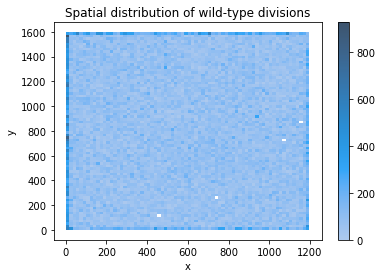

In [123]:
sbs.histplot(N_events_df, x = 'x', y = 'y', cbar = True,)
plt.title('Spatial distribution of wild-type divisions')

#### Cropped distributions

(1560.0, 1600.0)

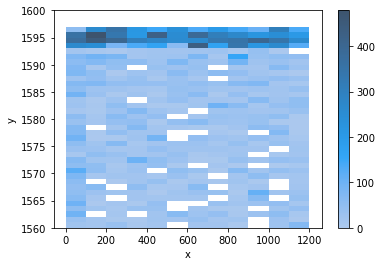

In [84]:
sbs.histplot(N_events_df, x = 'x', y = 'y', binwidth=(100,1), cbar = True)
plt.ylim(1560, 1600)

(0.0, 40.0)

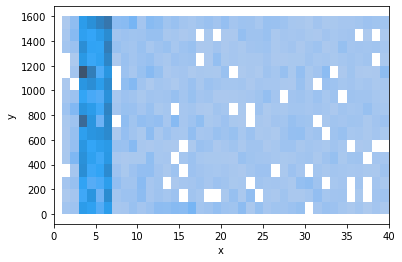

In [81]:
sbs.histplot(N_events_df, x = 'x', y = 'y', binwidth=(1,100))
plt.xlim(0,40)

#### Spatiotemporal distributions

In [206]:
import plotly
import plotly.graph_objs as go


#Read data from df
data = N_events_df

#Set marker properties
markercolor = data['Time since apoptosis']

#Make Plotly figure
fig1 = go.Scatter3d(x=data['x'],
                    y=data['y'],
                    z=data['Frame'],
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=1),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="x"),
                                yaxis=dict( title="y"),
                                zaxis=dict(title="t")),)

# #Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("4DPlot.html"))

'4DPlot.html'

Text(0.5, 1.0, 'Spatio-temporal distribution of wild-type divisions')

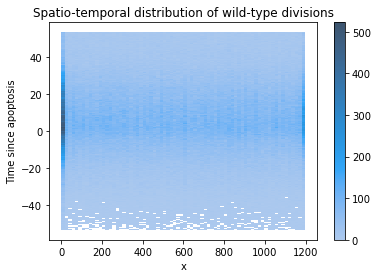

In [121]:
sbs.histplot(N_events_df, x = 'x', y = 'Time since apoptosis', cbar = True)
plt.title('Spatio-temporal distribution of wild-type divisions')

Text(0.5, 1.0, 'Spatio-temporal distribution of wild-type divisions')

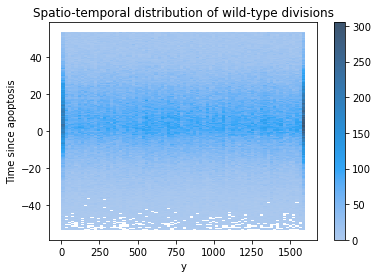

In [112]:
sbs.histplot(N_events_df, x = 'y', y = 'Time since apoptosis', cbar = True)
plt.title('Spatio-temporal distribution of wild-type divisions')

Text(0.5, 1.0, 'Spatio-temporal distribution of wild-type divisions')

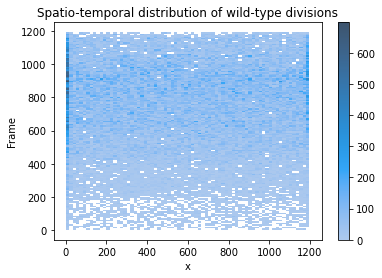

In [117]:
sbs.histplot(N_events_df, x = 'x', y = 'Frame', cbar = True)
plt.title('Spatio-temporal distribution of wild-type divisions')

Text(0.5, 1.0, 'Spatio-temporal distribution of wild-type divisions')

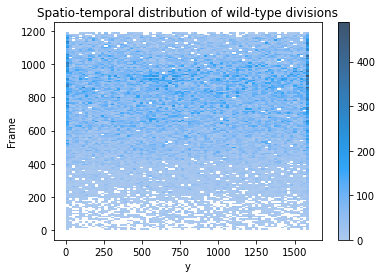

In [116]:
sbs.histplot(N_events_df, x = 'y', y = 'Frame', cbar = True)
plt.title('Spatio-temporal distribution of wild-type divisions')

Text(0.5, 1.0, 'Spatio-temporal distribution of wild-type divisions')

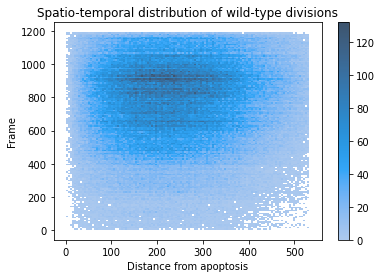

In [118]:
sbs.histplot(N_events_df, x = 'Distance from apoptosis', y = 'Frame', cbar = True)
plt.title('Spatio-temporal distribution of wild-type divisions')

# 10 pixels off edge of x and y

In [113]:
N_events_df

,Cell ID,Distance from apoptosis,Frame,x,y,Time since apoptosis
0,709,178.333333,1072,856,1327,5.133333
1,856,186.333333,976,746,1416,-1.266667
2,966,30.333333,1059,552,816,4.266667
3,979,280.666667,999,256,107,0.266667
4,1039,241.333333,1023,1052,1405,1.866667
...,...,...,...,...,...,...
476334,2700,385.666667,1113,1192,242,-2.133333
476335,2733,385.666667,1126,1191,239,-1.266667
476336,2739,321.333333,1120,1192,1310,-1.666667
476337,2786,299.333333,1131,3,116,-0.933333


In [125]:
crop_amount = 20

In [126]:
filt_N_events_df = N_events_df.loc[(N_events_df['x'] >= crop_amount) & (N_events_df['x'] <= 1200-crop_amount) & (N_events_df['y'] >= crop_amount) & (N_events_df['y'] <= 1600-crop_amount)]

In [127]:
len(filt_N_events_df) -  len(N_events_df)

-77828

<AxesSubplot:xlabel='x', ylabel='y'>

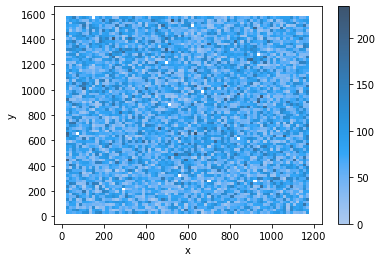

In [135]:
sbs.histplot(filt_N_events_df, x = 'x', y = 'y', cbar = True)

<AxesSubplot:xlabel='Time since apoptosis', ylabel='Distance from apoptosis'>

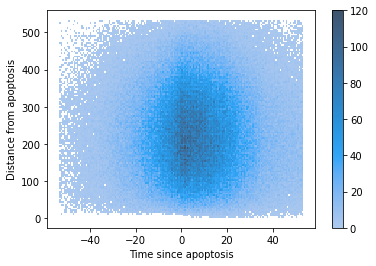

In [130]:
sbs.histplot(filt_N_events_df, x = 'Time since apoptosis', y = 'Distance from apoptosis', cbar = True)

### Loading cell counts for probability plot

Has to be streamlined for full list

In [9]:
cell_count_files = [file for file in files if 'N_cell' in file]

In [ ]:
N_cells_df = []
for file in tqdm(cell_count_files):
    df = pd.read_csv(file, names = ['Cell ID', 'Distance from apoptosis', 'Frame', 'x', 'y'])
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['y'] = df['y'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('txy_(\d+)', file).group(1))
    df['Time since apoptosis'] = df['Frame'] - apop_time
    N_cells_df.append(df)
N_cells_df = pd.concat(N_cells_df, axis = 0, ignore_index = True)
N_cells_df['Time since apoptosis'] = N_cells_df['Time since apoptosis']*(4/60)
N_cells_df['Distance from apoptosis'] = N_cells_df['Distance from apoptosis']/3

In [ ]:
### streamlined
N_cells_df = []
for file in tqdm(cell_count_files):
    df = pd.read_csv(file, names = ['Cell ID', 'Distance from apoptosis', 'Frame', 'x', 'y'])
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['y'] = df['y'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('txy_(\d+)', file).group(1))
    df['Time since apoptosis'] = df['Frame'] - apop_time
    del df['Cell ID'], df['Frame']
    N_cells_df.append(df)
N_cells_df = pd.concat(N_cells_df, axis = 0, ignore_index = True)
N_cells_df['Time since apoptosis'] = round(N_cells_df['Time since apoptosis']*(4/60), 2)
N_cells_df['Distance from apoptosis'] = round(N_cells_df['Distance from apoptosis']/3, 2)

  0%|          | 0/1839 [00:00<?, ?it/s]

<ipython-input-18-736709fadb6f>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-18-736709fadb6f>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['y'] = df['y'].str.replace('[()]', '')


In [15]:
N_cells_df

,Distance from apoptosis,Time since apoptosis
0,141.333333,-25.733333
1,120.000000,-25.733333
2,242.666667,-25.733333
3,236.666667,-25.733333
4,180.666667,-25.733333
...,...,...
314967734,422.000000,18.800000
314967735,410.666667,18.800000
314967736,418.666667,18.800000
314967737,332.333333,18.800000


# CROPPED atm

Text(0.5, 1.0, 'Spatial distribution of wild-type cells')

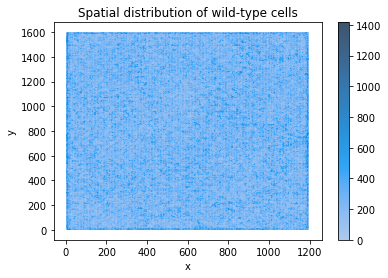

In [156]:
sbs.histplot(N_cells_df, x = 'x', y = 'y', cbar = True,)
plt.title('Spatial distribution of wild-type cells')

Text(0.5, 1.0, 'Spatial distribution of wild-type cells')

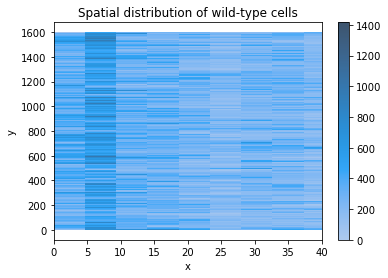

In [157]:
sbs.histplot(N_cells_df, x = 'x', y = 'y', cbar = True,)
plt.xlim(0,40)
plt.title('Spatial distribution of wild-type cells')

Text(0.5, 1.0, 'Spatial distribution of wild-type cells')

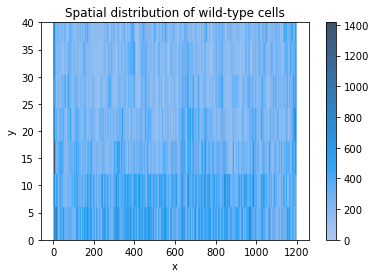

In [158]:
sbs.histplot(N_cells_df, x = 'x', y = 'y', cbar = True,)
plt.ylim(0,40)
plt.title('Spatial distribution of wild-type cells')

#### Cropping N_cells too 

In [ ]:
filt_N_cells_df = N_cells_df.loc[(N_cells_df['x'] >= crop_amount) & (N_cells_df['x'] <= 1200-crop_amount) & (N_cells_df['y'] >= crop_amount) & (N_cells_df['y'] <= 1600-crop_amount)]

Text(0.5, 1.0, 'Spatial distribution of wild-type cells')

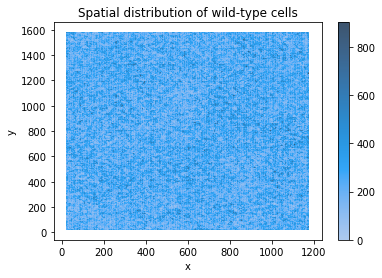

In [140]:
sbs.histplot(filt_N_cells_df, x = 'x', y = 'y', cbar = True,)
plt.title('Spatial distribution of wild-type cells')

Text(0.5, 1.0, 'Spatial distribution of wild-type cells')

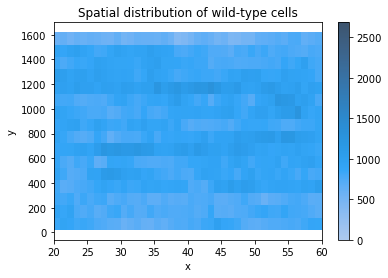

In [143]:
sbs.histplot(filt_N_cells_df, x = 'x', y = 'y', cbar = True, binwidth=(1,100))
plt.xlim(20,60)
plt.title('Spatial distribution of wild-type cells')

Text(0.5, 1.0, 'Spatial distribution of wild-type cells')

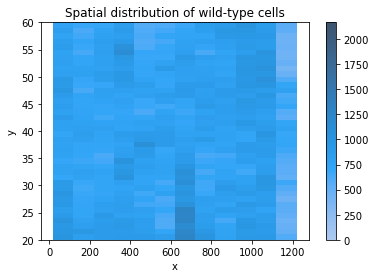

In [144]:
sbs.histplot(filt_N_cells_df, x = 'x', y = 'y', cbar = True, binwidth=(100,1))
plt.ylim(20,60)
plt.title('Spatial distribution of wild-type cells')

Text(0.5, 1.0, 'Spatial distribution of wild-type cells around scr. apoptoses')

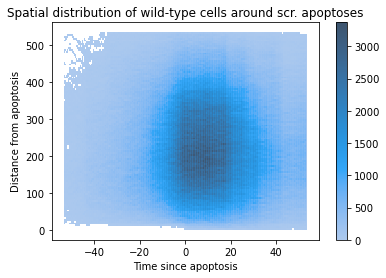

In [155]:
sbs.histplot(filt_N_cells_df, x = 'Time since apoptosis', y = 'Distance from apoptosis', cbar = True,  binwidth=(0.5,5))
plt.title('Spatial distribution of wild-type cells around scr. apoptoses')

# Plotting the ratio of N_events to N_cells (i.e. P_events)

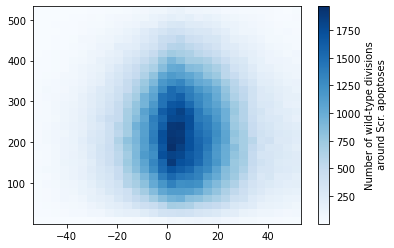

In [300]:
N_events, xedges, yedges, _ = plt.hist2d(filt_N_events_df['Time since apoptosis'], filt_N_events_df['Distance from apoptosis'],
                      bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Number of wild-type divisions\n around Scr. apoptoses')

In [ ]:
N_cells, xedges, yedges, _ = plt.hist2d(filt_N_cells_df['Time since apoptosis'], filt_N_cells_df['Distance from apoptosis'],
                      bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Number of wild-type cells\n around Scr. apoptoses')

<ipython-input-304-af06e202b59e>:1: RuntimeWarning:

divide by zero encountered in true_divide



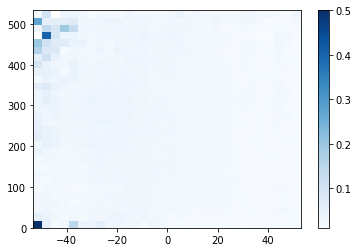

In [304]:
P_events = N_events/N_cells
pc = plt.pcolormesh(xedges, yedges, P_events.T, cmap = 'Blues')
plt.colorbar()